In [8]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = '/content/drive/My Drive/QuodAvis/SpotTheBird!/data'

In [0]:
verify_images(Path(path)/'train')
verify_images(Path(path)/'valid')
verify_images(Path(path)/'test')

In [0]:
data = ImageDataBunch.from_folder(path=path, train='train',
                                  valid='valid', test='test',
                                  ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [11]:
data.classes

['Aberrant bush warbler',
 'Alexandrine parakeet',
 'Alpine chough',
 'Alpine swift',
 'Amur falcon',
 'Amur paradise flycatcher',
 'Andaman bulbul',
 'Andaman coucal',
 'Andaman crake',
 'Andaman cuckoo-dove',
 'Andaman drongo',
 'Andaman green pigeon',
 'Andaman hawk-owl',
 'Andaman masked owl',
 'Andaman nightjar',
 'Andaman scops owl',
 'Andaman serpent eagle',
 'Andaman teal',
 'Arctic tern',
 'Arctic warbler',
 'Ashy drongo',
 'Ashy minivet',
 'Ashy wood pigeon',
 'Ashy woodswallow',
 'Ashy-crowned sparrow-lark',
 'Asian barred owlet',
 'Asian emerald cuckoo',
 'Asian house martin',
 'Asian koel',
 'Asian openbill',
 'Asian palm swift',
 'Asian short-toed lark',
 'Asian stubtail',
 "Austen's brown hornbill",
 "Baer's pochard",
 'Baikal teal',
 'Banded bay cuckoo',
 'Bar-tailed godwit',
 'Bar-winged flycatcher-shrike',
 "Barau's petrel",
 'Barn swallow',
 'Barred buttonquail',
 'Barred cuckoo-dove',
 'Bay woodpecker',
 'Bay-backed shrike',
 'Beach stone-curlew',
 'Bengal bush lark

In [0]:
len(data.classes), data.c

(737, 737)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 281MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.015512,3.279114,0.710573,16:12
1,2.720634,2.537679,0.568732,14:53
2,2.058332,2.227509,0.495828,16:00
3,1.700091,2.147144,0.476269,16:00


In [0]:
learn.save('stage-1')

In [0]:
learn = learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


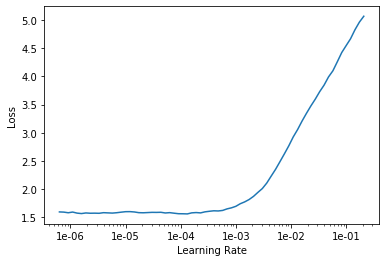

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.609613,2.113546,0.473533,1:20:25
1,1.489520,2.050240,0.459171,15:26
2,1.413756,2.025010,0.455204,15:05
3,1.392456,2.017368,0.452332,15:02


In [0]:
learn.save('stage-2')

In [0]:
learn = learn.load('stage-2')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


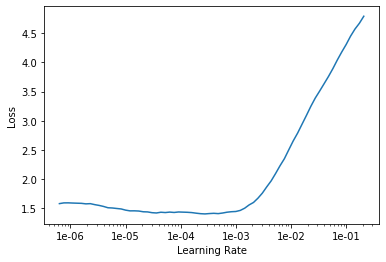

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.363243,2.013946,0.452742,15:09


KeyboardInterrupt: ignored

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
interp.most_confused(min_val=2)

[('Black-rumped magpie', 'Eurasian magpie', 6),
 ('Clicking shrike-babbler', 'Himalayan shrike-babbler', 6),
 ('Pin-tailed snipe', "Swinhoe's snipe", 6),
 ('Great cormorant', 'Indian cormorant', 5),
 ('Grey nightjar', 'Jungle nightjar', 5),
 ('Nepal cupwing', 'Scaly-breasted cupwing', 5),
 ('Rufous-vented tit', 'Rufous-naped tit', 5),
 ('Taiga bean goose', 'Tundra bean goose', 5),
 ('White-throated bushtit', 'Black-throated bushtit', 5),
 ('Andaman green pigeon', 'Green imperial pigeon', 4),
 ('Brown-capped pygmy woodpecker', 'Grey-capped pygmy woodpecker', 4),
 ('Brown-headed gull', 'Slender-billed gull', 4),
 ('Christmas frigatebird', 'Lesser frigatebird', 4),
 ('Common merganser', 'Red-breasted merganser', 4),
 ('Eastern marsh harrier', 'Western marsh harrier', 4),
 ('Eurasian golden oriole', 'Indian golden oriole', 4),
 ('European nightjar', 'Large-tailed nightjar', 4),
 ('Great tit', 'Green-backed tit', 4),
 ('Great-billed heron', 'White-bellied heron', 4),
 ('Indian black-lored t

In [0]:
learn.export('/content/drive/My Drive/QuodAvis/SpotTheBird!/trained_model_2.pkl')